In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [126]:
df_x = pd.read_csv(r"D:\SDA\Time-series-forecasting-of-Air-Quality-Prediction-main\train_x.csv")
df_y = pd.read_csv(r"D:\SDA\Time-series-forecasting-of-Air-Quality-Prediction-main\train_y.csv")
df_x1 = pd.read_csv(r"D:\SDA\Time-series-forecasting-of-Air-Quality-Prediction-main\test_x.csv")
df_y1 = pd.read_csv(r"D:\SDA\Time-series-forecasting-of-Air-Quality-Prediction-main\test_y.csv")

In [127]:
df_x.head(5)

,Date,PM2.5,PM10,NO2,NOx,CO,SO2,O3,temp,max_temp,min_temp,humid,visible,wind
0,01-01-2016,56.40,95.08,51.73,34.31,0.69,7.44,55.96,20.1,28.4,15.7,54.0,6.0,3.0
1,02-01-2016,53.69,93.92,73.09,54.77,0.76,8.67,34.06,20.8,28.3,12.9,45.0,6.3,1.1
2,03-01-2016,62.35,99.34,77.77,55.60,0.96,9.10,47.62,21.4,29.0,13.7,45.0,6.3,0.4
3,04-01-2016,64.96,104.62,77.07,50.81,0.89,8.87,50.62,21.5,29.0,15.2,47.0,6.9,2.2
4,05-01-2016,70.15,105.12,79.43,56.05,0.85,9.41,36.94,20.9,28.4,14.7,51.0,6.3,1.1


In [128]:
df_x1.head(5)

,Date,PM2.5,PM10,NO2,NOx,CO,SO2,O3,temp,max_temp,min_temp,humid,visible,wind
0,01-01-2020,30.71,70.80,27.31,26.74,1.07,8.56,37.39,22.0,27.2,19.2,75,6.9,3.3
1,02-01-2020,25.78,62.73,28.05,30.18,1.16,7.52,33.11,22.2,26.0,19.4,77,5.5,2.0
2,03-01-2020,29.66,69.62,26.26,26.92,0.99,6.40,32.98,23.4,28.4,19.4,68,6.9,3.5
3,04-01-2020,52.62,106.81,31.56,41.89,1.39,6.94,37.35,23.6,30.5,19.0,63,6.3,1.3
4,05-01-2020,52.64,97.94,29.10,29.52,1.01,7.01,45.10,24.2,30.5,20.4,63,6.3,1.3


In [129]:
df_y.head(5)

,Date,AQI
0,01-01-2016,101
1,02-01-2016,92
2,03-01-2016,108
3,04-01-2016,109
4,05-01-2016,114


In [130]:
df_y1.head(5)

,Date,AQI
0,01-01-2020,82
1,02-01-2020,81
2,03-01-2020,85
3,04-01-2020,95
4,05-01-2020,118


In [131]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1441 non-null   object 
 1   PM2.5     1441 non-null   float64
 2   PM10      1441 non-null   float64
 3   NO2       1441 non-null   float64
 4   NOx       1441 non-null   float64
 5   CO        1441 non-null   float64
 6   SO2       1441 non-null   float64
 7   O3        1441 non-null   float64
 8   temp      1441 non-null   float64
 9   max_temp  1441 non-null   float64
 10  min_temp  1441 non-null   float64
 11  humid     1441 non-null   float64
 12  visible   1441 non-null   float64
 13  wind      1441 non-null   float64
dtypes: float64(13), object(1)
memory usage: 157.7+ KB


In [132]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1441 non-null   object
 1   AQI     1441 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.6+ KB


In [133]:
df_x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      182 non-null    object 
 1   PM2.5     182 non-null    float64
 2   PM10      182 non-null    float64
 3   NO2       182 non-null    float64
 4   NOx       182 non-null    float64
 5   CO        182 non-null    float64
 6   SO2       182 non-null    float64
 7   O3        182 non-null    float64
 8   temp      182 non-null    float64
 9   max_temp  182 non-null    float64
 10  min_temp  182 non-null    float64
 11  humid     182 non-null    int64  
 12  visible   182 non-null    float64
 13  wind      182 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 20.0+ KB


In [134]:
df_y1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    182 non-null    object
 1   AQI     182 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [135]:
df_x["Date"] = pd.to_datetime(df_x["Date"])
df_x1["Date"] = pd.to_datetime(df_x["Date"])

In [136]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1441 non-null   datetime64[ns]
 1   PM2.5     1441 non-null   float64       
 2   PM10      1441 non-null   float64       
 3   NO2       1441 non-null   float64       
 4   NOx       1441 non-null   float64       
 5   CO        1441 non-null   float64       
 6   SO2       1441 non-null   float64       
 7   O3        1441 non-null   float64       
 8   temp      1441 non-null   float64       
 9   max_temp  1441 non-null   float64       
 10  min_temp  1441 non-null   float64       
 11  humid     1441 non-null   float64       
 12  visible   1441 non-null   float64       
 13  wind      1441 non-null   float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 157.7 KB


In [137]:
df_x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      182 non-null    datetime64[ns]
 1   PM2.5     182 non-null    float64       
 2   PM10      182 non-null    float64       
 3   NO2       182 non-null    float64       
 4   NOx       182 non-null    float64       
 5   CO        182 non-null    float64       
 6   SO2       182 non-null    float64       
 7   O3        182 non-null    float64       
 8   temp      182 non-null    float64       
 9   max_temp  182 non-null    float64       
 10  min_temp  182 non-null    float64       
 11  humid     182 non-null    int64         
 12  visible   182 non-null    float64       
 13  wind      182 non-null    float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 20.0 KB


<AxesSubplot:>

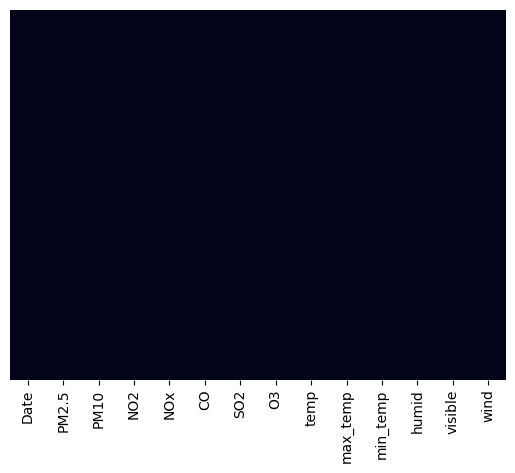

In [138]:
sns.heatmap(df_x.isnull(),cbar=False, yticklabels=False)

<AxesSubplot:>

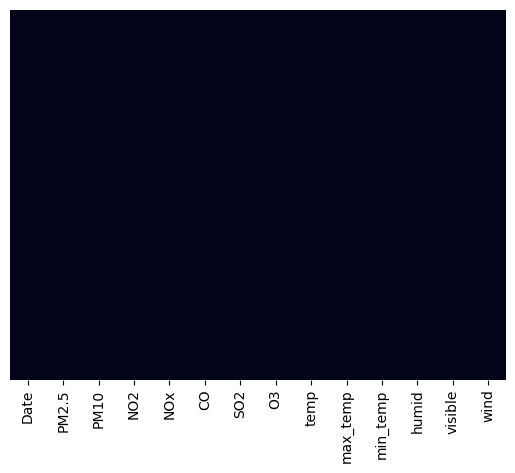

In [139]:
sns.heatmap(df_x1.isnull(),cbar=False, yticklabels=False)

In [140]:
x_train = df_x.drop(['Date'], axis = 1)
y_train = df_y["AQI"]
x_test = df_x1.drop(['Date'], axis = 1)
y_test = df_y1["AQI"]

In [141]:
x_train.head(5)

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,temp,max_temp,min_temp,humid,visible,wind
0,56.40,95.08,51.73,34.31,0.69,7.44,55.96,20.1,28.4,15.7,54.0,6.0,3.0
1,53.69,93.92,73.09,54.77,0.76,8.67,34.06,20.8,28.3,12.9,45.0,6.3,1.1
2,62.35,99.34,77.77,55.60,0.96,9.10,47.62,21.4,29.0,13.7,45.0,6.3,0.4
3,64.96,104.62,77.07,50.81,0.89,8.87,50.62,21.5,29.0,15.2,47.0,6.9,2.2
4,70.15,105.12,79.43,56.05,0.85,9.41,36.94,20.9,28.4,14.7,51.0,6.3,1.1


In [142]:
x_test.head(5)

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,temp,max_temp,min_temp,humid,visible,wind
0,30.71,70.80,27.31,26.74,1.07,8.56,37.39,22.0,27.2,19.2,75,6.9,3.3
1,25.78,62.73,28.05,30.18,1.16,7.52,33.11,22.2,26.0,19.4,77,5.5,2.0
2,29.66,69.62,26.26,26.92,0.99,6.40,32.98,23.4,28.4,19.4,68,6.9,3.5
3,52.62,106.81,31.56,41.89,1.39,6.94,37.35,23.6,30.5,19.0,63,6.3,1.3
4,52.64,97.94,29.10,29.52,1.01,7.01,45.10,24.2,30.5,20.4,63,6.3,1.3


In [143]:
y_train.head(5)

0    101
1     92
2    108
3    109
4    114
Name: AQI, dtype: int64

In [144]:
y_test.head(5)

0     82
1     81
2     85
3     95
4    118
Name: AQI, dtype: int64

In [145]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1))
y_test = sc_y.transform(np.array(y_test).reshape(-1,1))

In [146]:
y_test[:5]

array([[-0.27610501],
       [-0.30227705],
       [-0.1975889 ],
       [ 0.06413148],
       [ 0.66608835]])

In [147]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(x_train,y_train)

GradientBoostingRegressor()

In [148]:
y_prediction =  regressor.predict(x_test)
y_prediction 

array([-0.30664804,  0.02744572, -0.45522542,  0.56821672,  0.39152822,
       -0.33634286, -0.45985514, -0.13761619,  0.2143014 ,  0.06167804,
       -0.43960068, -0.05112363,  0.40469432,  0.91172871,  0.24935003,
        0.3401905 ,  0.25525234, -0.59217264, -0.56262187, -0.01497732,
        0.06956749, -0.02144429,  0.04325327,  0.15946079,  0.18445999,
        0.25582021,  0.30949316,  0.40278976,  0.4255181 ,  0.2840163 ,
        0.42057773,  0.45941365, -0.24938814, -0.25418846, -0.42233104,
        0.11668699,  0.33066575,  0.29736598,  0.32064903,  0.40746018,
       -0.16741751, -0.111393  , -0.30030268,  0.00940919,  0.52902124,
        0.71358505,  0.42003359,  0.26898953,  0.4043111 ,  0.51775921,
        0.24915815, -0.20381795, -0.32190889,  0.13897561, -0.13482574,
        0.45736284,  0.20233839,  0.32740855,  0.14504189,  0.24373536,
        0.46737379,  0.65162783,  1.76219073,  0.63494524,  0.62830402,
        0.30860789,  0.10367324, -0.05551396,  0.20358275,  0.30

In [149]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.7707293072782071
mean_sqrd_error is  0.05839803437638141
Root mean squared error of is 0.24165685253346617
Mean Absolute error is 0.18752259116758224


In [150]:
y_test

array([[-0.27610501],
       [-0.30227705],
       [-0.1975889 ],
       [ 0.06413148],
       [ 0.66608835],
       [-0.30227705],
       [-0.45930927],
       [ 0.01178741],
       [ 0.22116371],
       [ 0.03795944],
       [-0.38079316],
       [-0.35462112],
       [ 0.3520239 ],
       [ 0.74460446],
       [ 0.48288408],
       [ 0.5614002 ],
       [ 0.3520239 ],
       [-0.17141686],
       [-0.69485761],
       [-0.30227705],
       [-0.06672871],
       [-0.14524482],
       [-0.27610501],
       [ 0.40436797],
       [ 0.19499167],
       [ 0.11647556],
       [ 0.14264759],
       [ 0.24733575],
       [ 0.58757224],
       [ 0.50905612],
       [ 0.48288408],
       [ 0.24733575],
       [ 0.03795944],
       [-0.35462112],
       [-0.27610501],
       [-0.17141686],
       [ 0.09030352],
       [ 0.09030352],
       [ 0.32585186],
       [ 0.22116371],
       [ 0.27350778],
       [-0.14524482],
       [-0.32844908],
       [-0.22376093],
       [ 0.48288408],
       [ 0

In [151]:
y_prediction
# l = [1, 2, 3, 4, 5]
# l2 = [[i] for i in l]
# print(l2)
y_prediction1 = [[i] for i in y_prediction]
y_prediction1

[[-0.30664803828809956],
 [0.027445719723025012],
 [-0.45522541963949487],
 [0.568216721374995],
 [0.39152821760040674],
 [-0.3363428606572282],
 [-0.4598551409200967],
 [-0.13761618755244007],
 [0.21430140127877537],
 [0.06167804475360563],
 [-0.43960068494898175],
 [-0.051123626544819056],
 [0.40469432264533406],
 [0.9117287074694196],
 [0.2493500345936081],
 [0.34019049602926266],
 [0.2552523427588425],
 [-0.5921726402771194],
 [-0.5626218666920239],
 [-0.014977323702463761],
 [0.06956749101163441],
 [-0.021444291491791195],
 [0.04325326876382662],
 [0.15946078740939928],
 [0.18445999209211253],
 [0.2558202105700741],
 [0.30949316385651454],
 [0.40278976492189056],
 [0.42551810367745574],
 [0.28401629706207565],
 [0.42057772707225743],
 [0.45941364624068576],
 [-0.24938813562242754],
 [-0.2541884625357335],
 [-0.42233104491001316],
 [0.11668699319409563],
 [0.3306657462159678],
 [0.29736598048569596],
 [0.32064903310762677],
 [0.40746017710756527],
 [-0.16741750843113798],
 [-0.1113

In [152]:
y_test = sc_y.inverse_transform(y_test)
y_test[:5]

array([[ 82.],
       [ 81.],
       [ 85.],
       [ 95.],
       [118.]])

In [153]:
y_prediction = sc_y.inverse_transform(y_prediction1)
y_prediction[:5]

array([[ 80.83298999],
       [ 93.59828408],
       [ 75.15603877],
       [114.26045062],
       [107.50940946]])

In [92]:
y_predictionn = []
for i in range(len(y_prediction)):
    y_predictionn.append(y_prediction[i])
y_predictionn

[array([ 80.83298999,  93.59828408,  75.15603877, 114.26045062,
        107.50940946,  79.69838891,  74.97914306,  87.29148026,
        100.73780007,  94.90625732,  75.75303985,  90.59625011,
        108.01246945, 127.38560313, 102.0769634 , 105.54786095,
        102.30248303,  69.92346108,  71.05255824,  91.97735399,
         95.20770295,  91.73025944,  94.20227026,  98.64241053,
         99.59759809, 102.32418053, 104.37495525, 107.93969874,
        108.80811942, 103.40151684, 108.61935397, 110.10322464,
         83.02081745,  82.83740311,  76.41289065,  97.0080787 ,
        105.18393247, 103.91159112, 104.80120671, 108.1181492 ,
         86.15281   ,  88.29343479,  81.07543816,  92.9091314 ,
        112.76284144, 119.81478799, 108.59856304, 102.82736324,
        107.99782701, 112.33253379, 102.06963182,  84.76199592,
         80.24989225,  97.85969836,  87.39809969, 110.02486604,
        100.28070871, 105.0594791 ,  98.09148291, 101.86243384,
        110.40737154, 117.44748221, 159.

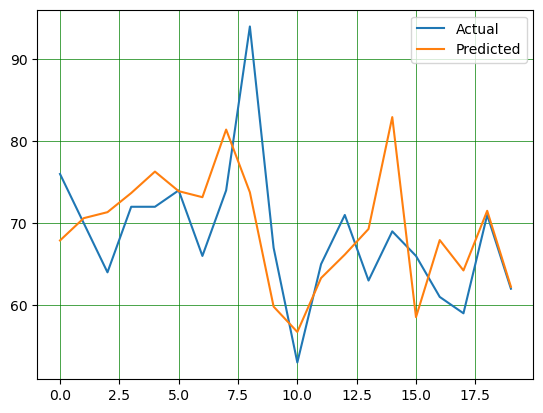

In [154]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [155]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERNCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)

,ACTUAL AQI,PREDICTED AQI,DIFFERNCE,PERCENTAGE ERROR
0,82.0,80.832990,1.167010,1.423183
1,81.0,93.598284,-12.598284,15.553437
2,85.0,75.156039,9.843961,11.581131
3,95.0,114.260451,-19.260451,20.274159
4,118.0,107.509409,10.490591,8.890331
5,81.0,79.698389,1.301611,1.606927
6,75.0,74.979143,0.020857,0.027809
7,93.0,87.291480,5.708520,6.138193
8,101.0,100.737800,0.262200,0.259604
9,94.0,94.906257,-0.906257,0.964104
